In [1]:
# import libraries
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV, RepeatedKFold, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.dummy import DummyRegressor
from scipy.stats import loguniform
import sklearn.metrics as metrics

import statsmodels.api as sm

In [2]:
train_df =pd.read_csv('../datasets/prepped_train.csv')
test_df = pd.read_csv('../datasets/prepped_test.csv')

/var/folders/f6/gmkl1q215gqd9pl16s0gr_v80000gn/T/ipykernel_2283/1111669981.py:1: DtypeWarning: Columns (4,39) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df =pd.read_csv('../datasets/prepped_train.csv')
/var/folders/f6/gmkl1q215gqd9pl16s0gr_v80000gn/T/ipykernel_2283/1111669981.py:2: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv('../datasets/prepped_test.csv')


In [3]:
train_df.shape

(150634, 131)

In [4]:
train_df.head()

,id,tranc_yearmonth,date_ym,town,block,street_name,storey_range,floor_area_sqm,lease_commence_date,tranc_year,tranc_month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,latitude,longitude,postal_2d,district_num,planning_area,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude,resale_price,central,levels,a,clipped_floor_area_sqm,clipped_lease_commence_date,clipped_floor_area_sqft,clipped_hdb_age,clipped_max_floor_lvl,clipped_year_completed,clipped_total_dwelling_units,clipped_2room_sold,clipped_3room_sold,clipped_4room_sold,clipped_5room_sold,clipped_exec_sold,clipped_studio_apartment_sold,clipped_2room_rental,clipped_latitude,clipped_longitude,clipped_mall_nearest_distance,clipped_mall_within_2km,clipped_hawker_nearest_distance,clipped_hawker_food_stalls,clipped_hawker_market_stalls,clipped_mrt_nearest_distance,clipped_mrt_latitude,clipped_mrt_longitude,clipped_bus_stop_nearest_distance,clipped_bus_stop_latitude,clipped_bus_stop_longitude,clipped_pri_sch_nearest_distance,clipped_vacancy,clipped_pri_sch_latitude,clipped_pri_sch_longitude,clipped_sec_sch_nearest_dist,clipped_cutoff_point,clipped_sec_sch_latitude,clipped_sec_sch_longitude,clipped_resale_price,log_resale_price,region_East,region_North,region_North East,region_West,flat_type_2 room,flat_type_3 room,flat_type_4 room,flat_type_5 room,flat_type_executive,flat_type_multi-generation,flat_model_premium,flat_model_special,flat_model_standard
0,1,2015-03,2015-03-01,BUKIT MERAH,7,TELOK BLANGAH CRES,07 TO 09,31.0,1975,2015,3,8,7,9,8,1 ROOM Improved,"7, TELOK BLANGAH CRES",333.684,46,12,1974,1,0,0,0,0,262,255,0,2,0,0,0,0,0,5,0,0,0,90007,1.278361,103.819384,9,4,Bukit Merah,1246.092272,0.0,0.0,5.0,125.006922,1.0,5.0,14.0,56,77,1180.622358,Tiong Bahru,0,0,1.285765,103.826997,99.027522,Blk 11,1.277845,103.818658,418.947636,CHIJ,67,1,1.276029,103.822344,418.947636,CHIJ Saint Theresa's Convent,235,0,1.276029,103.822344,210000.0,1,6-10,1,63.0,1975,678.132,46,12,1974,234,0,2,0,0,0,0,0,1.294022,103.819384,1246.092272,5.0,155.33401,56,77,1180.622358,1.29425,103.826997,99.027522,1.293199,103.818658,418.947636,67,1.295988,103.822344,418.947636,235,1.295014,103.822344,268000.0,12.254863,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,2015-04,2015-04-01,BUKIT MERAH,7,TELOK BLANGAH CRES,01 TO 03,31.0,1975,2015,4,2,1,3,2,1 ROOM Improved,"7, TELOK BLANGAH CRES",333.684,46,12,1974,1,0,0,0,0,262,255,0,2,0,0,0,0,0,5,0,0,0,90007,1.278361,103.819384,9,4,Bukit Merah,1246.092272,0.0,0.0,5.0,125.006922,1.0,5.0,14.0,56,77,1180.622358,Tiong Bahru,0,0,1.285765,103.826997,99.027522,Blk 11,1.277845,103.818658,418.947636,CHIJ,67,1,1.276029,103.822344,418.947636,CHIJ Saint Theresa's Convent,235,0,1.276029,103.822344,208000.0,1,0-5,1,63.0,1975,678.132,46,12,1974,234,0,2,0,0,0,0,0,1.294022,103.819384,1246.092272,5.0,155.33401,56,77,1180.622358,1.29425,103.826997,99.027522,1.293199,103.818658,418.947636,67,1.295988,103.822344,418.947636,235,1.295014,103.822344,268000.0,12.245293,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,2015-05,2015-05-01,BUKIT MERAH,7,TELOK BLANGAH CRES,01 TO 03,31.0,1975,2015,5,2,1,3,2,1 ROOM Improved,"7, TELOK BLANGAH CRES",333.684,46,12,1974,1,0,0,0,0,262,255,0,2,0,0,0,0,0,5,0,0,0,90007,1.278361,103.819384,9,4,Bukit Me

In [5]:
features=['tranc_year','floor_area_sqm', 'mid_storey', 'hdb_age', 'max_floor_lvl', 'clipped_mall_nearest_distance', 
          'clipped_hawker_nearest_distance', 'clipped_mrt_nearest_distance','region_East', 'region_North','region_North East', 
          'region_West', 'flat_type_2 room', 'flat_type_3 room', 'flat_type_4 room', 'flat_type_5 room', 
          'flat_type_executive', 'flat_type_multi-generation', 'flat_model_premium', 'flat_model_special', 'flat_model_standard']

y= train_df['log_resale_price'].values
X = train_df[features]

identifying the best test:test split

In [6]:
for i in np.linspace(0.1,0.95,18):
    print(round(i, 2))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=round(i, 2), random_state=42)
    lri = LinearRegression()
    lri.fit(X_train, y_train)
    print(lri.score(X_test, y_test))
    print("")

0.1
0.8446278939454119

0.15
0.8436129917224897

0.2
0.8444555090002995

0.25
0.8432079942537638

0.3
0.8429626774675993

0.35
0.8432513457944794

0.4
0.8430689505260429

0.45
0.8430087022002131

0.5
0.842621866746401

0.55
0.8427468109358777

0.6
0.8426550937396018

0.65
0.8428597526824473

0.7
0.8426106807687187

0.75
0.8423881508962942

0.8
0.8420714098803984

0.85
0.8417446097575244

0.9
0.841833327079525

0.95
0.8419544804838681



In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Since we're using `Lasso` and `Ridge`, we'll want to scale our features. In the cell below, fit a `StandardScaler` to 
# `X_train` and use it to transform both `X_train` and `X_test`.
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

# fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data. 
# The fit method is calculating the mean and variance of each of the features present in our data. 
# The transform method is transforming all the features using the respective mean and variance.

# Using the transform method we can use the same mean and variance as it is calculated from our training data to transform our test data. 
# Thus, the parameters learned by our model using the training data will help us to transform our test data.
# If we will use the fit method on our test data too, we will compute a new mean and variance that is a new scale for each feature 
# and will let our model learn about our test data too. 
# Thus, what we want to keep as a surprise is no longer unknown to our model and we will not get a good estimate of how our model is 
#performing on the test (unseen) data which is the ultimate goal of building a model using machine learning algorithm.

In [8]:
lr=LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)
    

0.84325134579448

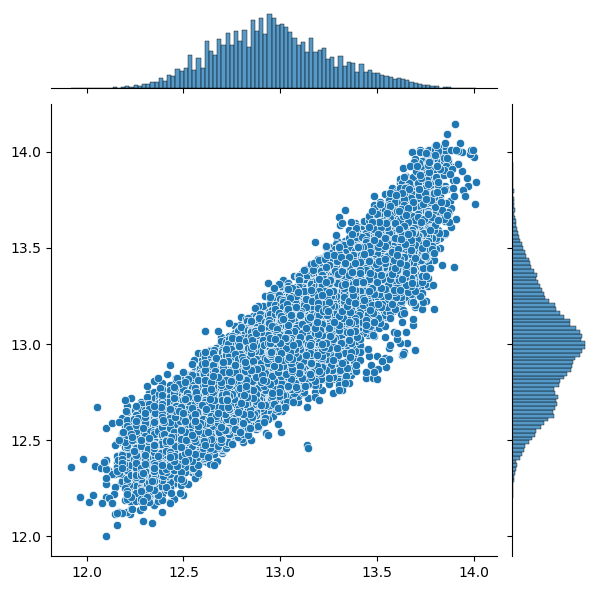

In [9]:
yhat = lr.predict(X_test)
sns.jointplot(x=y_test, y=yhat)

Baseline Model

In [10]:
base_model = DummyRegressor(strategy='median')
base_model.fit(X, y)
base_model.predict(X)
base_model.score(X, y)

-0.004555039083601331

In [11]:
# The mean R^2 is extremely negative. All the R^2 scores are negative in crossvalidation.
# The baseline model is too general

In [12]:
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

Linear Regression CV

In [13]:
lr = LinearRegression()
lr_scores = cross_val_score(lr, X_train, y_train, cv=10)

print (lr_scores)
print (np.mean(lr_scores))

[0.83871928 0.84213164 0.84272213 0.84485715 0.84325001 0.83888936
 0.83863516 0.83977931 0.84424031 0.84471598]
0.8417940321289402


In [14]:
lr.fit(X_train, y_train)
#display regression coefficients and R-squared value of model
print(lr.intercept_, lr.coef_)

12.968266543349296 [-0.04122321  0.17474076  0.0372948  -0.08317709  0.03254435 -0.00800592
 -0.05294623 -0.04493569 -0.05233276 -0.12158266 -0.05700429 -0.09757942
  0.00314927  0.0923074   0.13653986  0.12462539  0.08867761  0.0061255
 -0.02287561  0.01464233 -0.02756436]


In [15]:
# Linear Regression is vastly better than baseline model
# X17 = multi-gen flat model, X12 = 2 room flat type. very little obs so not impt to model

## Ridge CV

In [16]:
%%time
# Numpy linspace returns evenly spaced numbers over a specified interval. Numpy logspace return numbers spaced evenly on a log scale.
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)

print (optimal_ridge.alpha_)

1.0
CPU times: user 1min 36s, sys: 1min 6s, total: 2min 42s
Wall time: 21.4 s


In [17]:
ridge = Ridge(alpha=optimal_ridge.alpha_)
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=10)

print (ridge_scores)
print (np.mean(ridge_scores))

[0.83872046 0.84213074 0.84272137 0.84485336 0.84325033 0.83888909
 0.83863376 0.83977989 0.84424639 0.84471542]
0.8417940801740293


In [18]:
ridge.fit(X_train, y_train)

Ridge()

In [19]:
ridge_pred = ridge.predict(X_train)
regression_results(y_train, ridge_pred)

explained_variance:  0.8419
mean_squared_log_error:  0.0001
r2:  0.8419
MAE:  0.0935
MSE:  0.0144
RMSE:  0.1201


In [20]:
ridge_pred = ridge.predict(X_test)
regression_results(y_test, ridge_pred)

explained_variance:  0.8433
mean_squared_log_error:  0.0001
r2:  0.8433
MAE:  0.0934
MSE:  0.0143
RMSE:  0.1198


<AxesSubplot: >

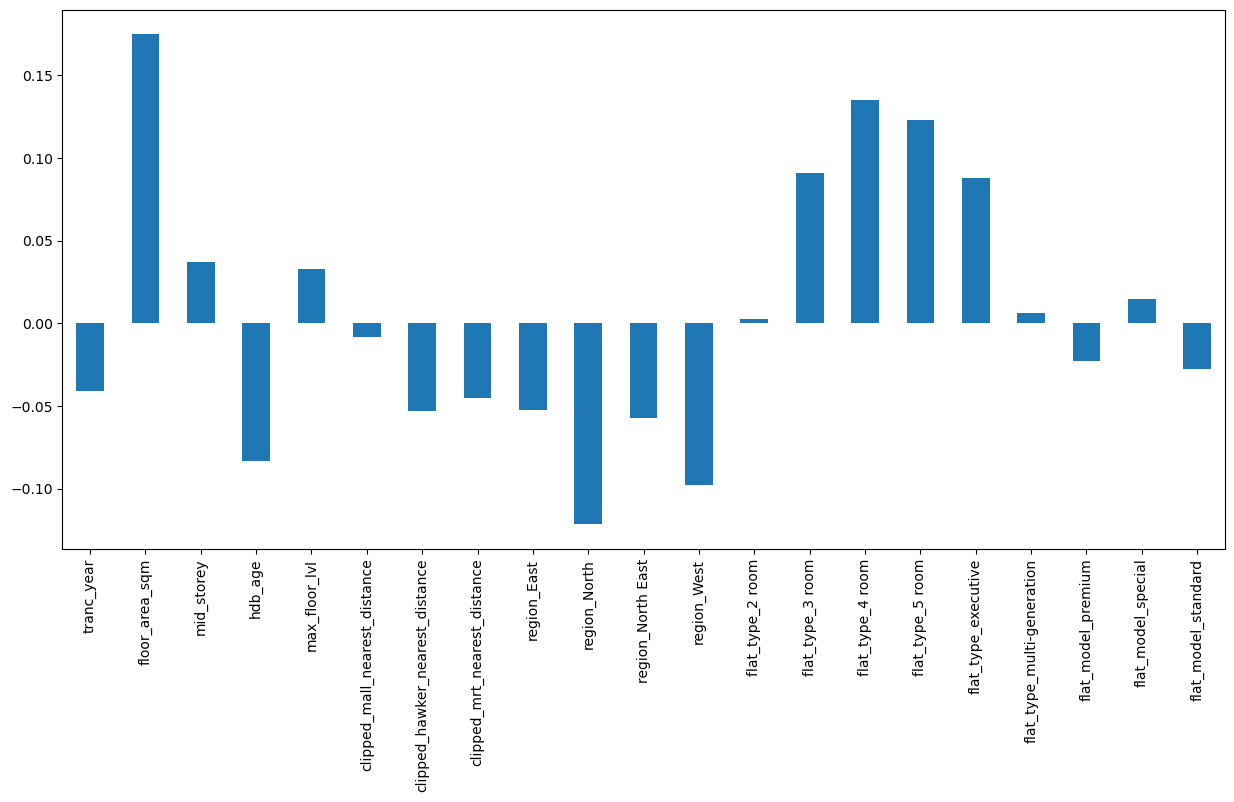

In [21]:
pd.Series(ridge.coef_, index=features).plot.bar(figsize=(15, 7))

In [22]:
pd.Series(ridge.coef_, index=X.columns)

tranc_year                        -0.041222
floor_area_sqm                     0.174783
mid_storey                         0.037295
hdb_age                           -0.083176
max_floor_lvl                      0.032551
clipped_mall_nearest_distance     -0.008007
clipped_hawker_nearest_distance   -0.052945
clipped_mrt_nearest_distance      -0.044939
region_East                       -0.052326
region_North                      -0.121573
region_North East                 -0.056994
region_West                       -0.097571
flat_type_2 room                   0.002796
flat_type_3 room                   0.090885
flat_type_4 room                   0.134920
flat_type_5 room                   0.123197
flat_type_executive                0.087761
flat_type_multi-generation         0.006062
flat_model_premium                -0.022872
flat_model_special                 0.014643
flat_model_standard               -0.027561
dtype: float64

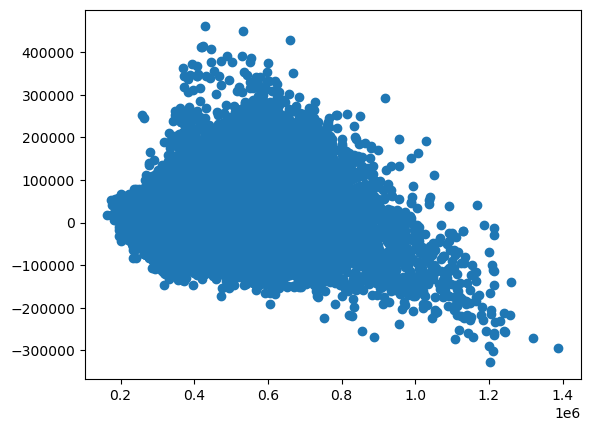

In [23]:
ridge_residuals = np.exp(y_test) - np.exp(ridge_pred)
plt.scatter(np.exp(ridge_pred), ridge_residuals)

## Lasso CV

In [24]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)

print (optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.00021251468444870254


In [25]:
lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=10)

print (lasso_scores)
print (np.mean(lasso_scores))

[0.83853898 0.84172701 0.84233876 0.84422112 0.84266237 0.83818065
 0.83813113 0.83956325 0.84372712 0.84408531]
0.8413175690199537


In [26]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.00021251468444870254)

In [27]:
lasso_pred = lasso.predict(X_train)
regression_results(y_train, lasso_pred)

explained_variance:  0.8414
mean_squared_log_error:  0.0001
r2:  0.8414
MAE:  0.0937
MSE:  0.0145
RMSE:  0.1202


In [28]:
lasso_pred = lasso.predict(X_test)
regression_results(y_test, lasso_pred)

explained_variance:  0.8428
mean_squared_log_error:  0.0001
r2:  0.8428
MAE:  0.0935
MSE:  0.0144
RMSE:  0.1199


<AxesSubplot: >

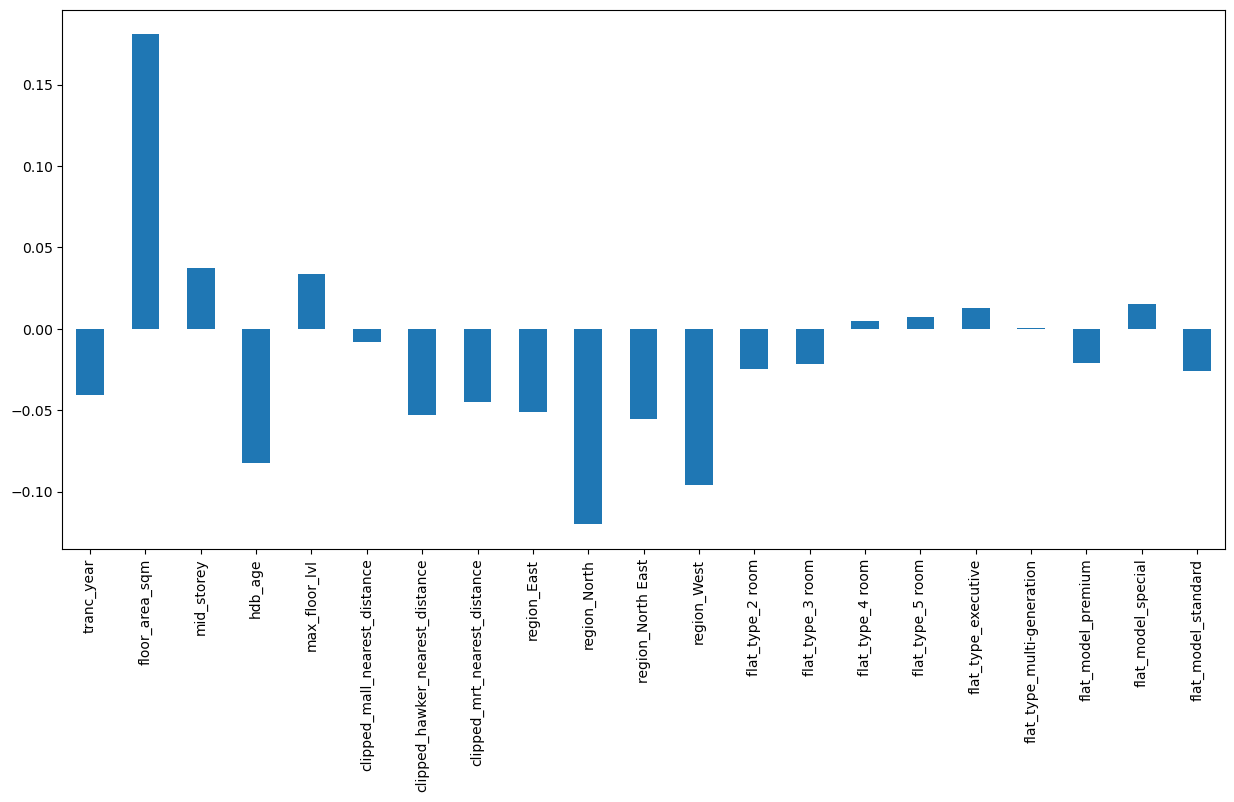

In [29]:
pd.Series(lasso.coef_, index=features).plot.bar(figsize=(15, 7))

In [30]:
pd.Series(lasso.coef_, index=X.columns)

tranc_year                        -0.040901
floor_area_sqm                     0.180943
mid_storey                         0.037187
hdb_age                           -0.082591
max_floor_lvl                      0.033638
clipped_mall_nearest_distance     -0.007802
clipped_hawker_nearest_distance   -0.052625
clipped_mrt_nearest_distance      -0.045187
region_East                       -0.051148
region_North                      -0.120023
region_North East                 -0.055276
region_West                       -0.096173
flat_type_2 room                  -0.024653
flat_type_3 room                  -0.021683
flat_type_4 room                   0.004855
flat_type_5 room                   0.007300
flat_type_executive                0.012990
flat_type_multi-generation         0.000632
flat_model_premium                -0.020889
flat_model_special                 0.015196
flat_model_standard               -0.025601
dtype: float64

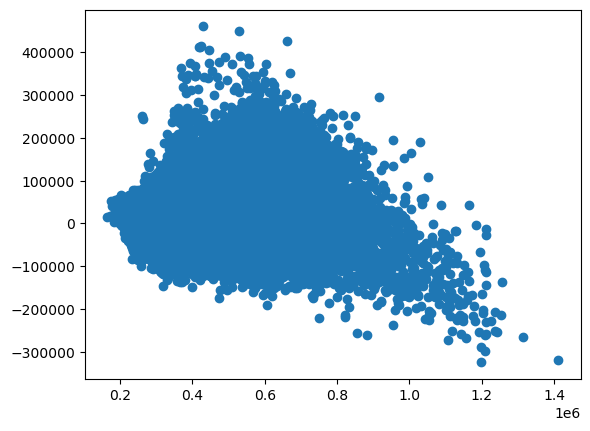

In [32]:
lasso_residuals = np.exp(y_test) - np.exp(lasso_pred)
plt.scatter(np.exp(lasso_pred), lasso_residuals)

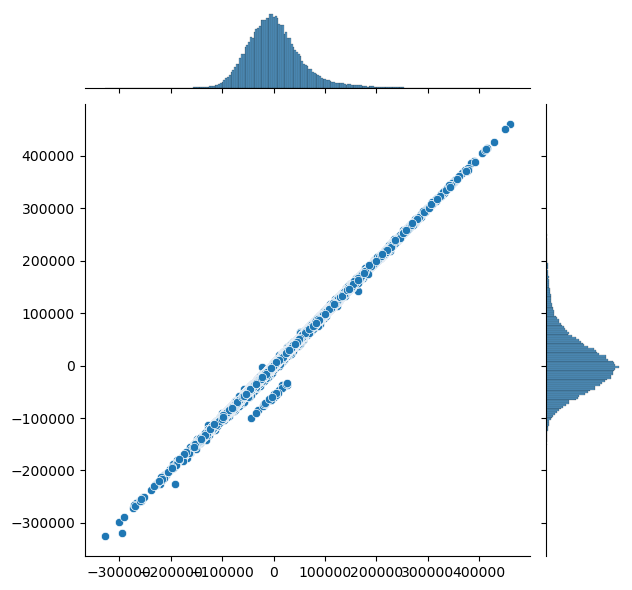

In [33]:
sns.jointplot(x=ridge_residuals, y=lasso_residuals) 

In [34]:
# Ridge performs slightly better than Lasso
# Lasso deals primarily with the feature selection of valuable variables,
# eliminating ones that are not useful. This also takes care of multicollinearity,
# but in a different way: it will choose the "best" of the correlated variables
# and zero-out the other redundant ones.
# There may also be useless variables in the data which it is simply getting rid
# of entirely.

In [35]:
ridge_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':ridge.coef_,
                            'abs_coef':np.abs(ridge.coef_)})
ridge_coefs.sort_values('abs_coef', inplace=True, ascending=False)
ridge_coefs.head(20)

,variable,coef,abs_coef
1,floor_area_sqm,0.174783,0.174783
14,flat_type_4 room,0.134920,0.134920
15,flat_type_5 room,0.123197,0.123197
9,region_North,-0.121573,0.121573
11,region_West,-0.097571,0.097571
13,flat_type_3 room,0.090885,0.090885
16,flat_type_executive,0.087761,0.087761
3,hdb_age,-0.083176,0.083176
10,region_North East,-0.056994,0.056994
6,clipped_hawker_nearest_distance,-0.052945,0.052945


## Elastic Net CV

In [36]:
l1_ratios = np.linspace(0.01, 1.0, 25)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10,
                            verbose=1)
optimal_enet.fit(X_train, y_train)

print (optimal_enet.alpha_)
print (optimal_enet.l1_ratio_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.0008252997454318542
0.2575


In [37]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, X_train, y_train, cv=10)

print (enet_scores)
print (np.mean(enet_scores))

[0.83854224 0.84173921 0.84233569 0.84423225 0.84267251 0.83821838
 0.8381487  0.83958029 0.84371823 0.84407019]
0.8413257686020407


In [38]:
enet.fit(X_train, y_train)

ElasticNet(alpha=0.0008252997454318542, l1_ratio=0.2575)

In [39]:
enet_pred = enet.predict(X_train)
regression_results(y_train, enet_pred)

explained_variance:  0.8415
mean_squared_log_error:  0.0001
r2:  0.8415
MAE:  0.0936
MSE:  0.0145
RMSE:  0.1202


In [40]:
enet_pred = enet.predict(X_test)
regression_results(y_test, enet_pred)

explained_variance:  0.8428
mean_squared_log_error:  0.0001
r2:  0.8428
MAE:  0.0935
MSE:  0.0144
RMSE:  0.1199


In [41]:
# ElasticNet does not perform better than ridge

In [42]:
# printing values
print('Slope:' , ridge.coef_)
print('Intercept:', ridge.intercept_)

Slope: [-0.0412224   0.17478277  0.03729497 -0.08317575  0.03255121 -0.00800734
 -0.05294482 -0.0449391  -0.05232573 -0.12157332 -0.05699386 -0.09757087
  0.00279635  0.09088455  0.13492044  0.12319682  0.08776075  0.00606199
 -0.02287218  0.01464312 -0.02756113]
Intercept: 12.968266543349296


In [43]:
data = test_df[features]
data = ss.transform(data)
predicted=ridge.predict(data)
predicted=np.exp(predicted)
predicted

array([203394.18755799, 197384.12188193, 194446.0171709 , ...,
       730784.60902905, 772995.67414915, 954518.22218332])

In [44]:
sample_id=test_df.reset_index()['id'].values
sample_id

array([     7,     14,     30, ..., 185939, 185957, 185967])

In [45]:
df = pd.DataFrame({'Id': list(sample_id),
                   'Predicted': list(predicted),
                  })
df.to_csv('../datasets/sample_sub_reg4.csv', index=False)